# Подготовка

In [ ]:
import pandas as pd
import io 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option('display.float_format', '{:.8g}'.format)
np.set_printoptions(precision = 3, suppress= True)
pd.options.display.max_rows = 100

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ЛР1. КАСКО БД.xlsx to ЛР1. КАСКО БД.xlsx




---



In [ ]:
df = pd.read_excel(io.BytesIO(uploaded['ЛР1. КАСКО БД.xlsx']))
df.head(10)

,n,Surname,Name,Patronymic,Sex,Age,experience,Model,Type,Light accident,Tough accident,Hijacking,Pay
0,1,Иванов,Иван,Артемович,муж,23,4,Renault Duster,частичное,0,0,0,0
1,2,Козлова,Стася,Максимовна,жен,18,0,Lada 4x4,частичное,1,0,0,114112.7
2,3,Иванов,Владимир,Тимурович,муж,30,7,Lada 4x4,полное,0,0,0,0
3,4,Козлов,Богдан,Матвеевич,муж,32,3,Lada Granta,частичное,0,0,0,0
4,5,Смирнов,Иван,Алексеевич,муж,52,32,Lada Granta,полное,0,0,0,0
5,6,Николаева,Виктория,Михайловна,жен,67,41,Lada 4x4,полное,1,0,0,59251.9
6,7,Фролов,Алан,Даниилович,муж,79,50,Datsun on-DO,полное,0,0,0,0
7,8,Ильин,Давид,Демидович,муж,42,12,KIA Rio,частичное,0,0,0,0
8,9,Васильев,Семён,Евгеньевич,муж,19,0,KIA Rio,частичное,0,0,0,0
9,10,Михайлова,Ирина,Никитична,жен,57,33,Lada Granta,частичное,0,0,0,0


In [ ]:
df.describe()

,n,Age,Light accident,Tough accident,Hijacking,Pay,Unnamed: 13,Unnamed: 14
count,9851,9851,9851,9851,9851,9851,0,1
mean,4926,44.339,0.20028,0.024363,0.0068013,19456,nan,9354.6
std,2843.9,16.183,0.40023,0.15418,0.082193,89653,nan,nan
min,1,18,0,0,0,0,nan,9354.6
25%,2463.5,32,0,0,0,0,nan,9354.6
50%,4926,42,0,0,0,0,nan,9354.6
75%,7388.5,56,0,0,0,0,nan,9354.6
max,9851,89,1,1,1,2.4554e+06,nan,9354.6


# 1 задание

*Изучить зависимость структуры клиентов «ПОЛ-СТАЖ ВОЖДЕНИЯ» и частоту попадания в ДТП (для каждого типа ДТП) и сформулировать выводы*

Тут была эта строчка, но она уже выполнена: df.experience=pd.cut(df.experience, 7, right=True, labels=None, retbins=False, precision=3, include_lowest=True, duplicates='raise', ordered=True) 



In [ ]:
dfnf['Sex'].value_counts()

муж    6131
жен    3720
Name: Sex, dtype: int64

In [ ]:
df.experience=pd.cut(df.experience, 7, right=True, labels=None, retbins=False, precision=3, include_lowest=True, duplicates='raise', ordered=True)

In [ ]:
df['experience'].value_counts()

(-0.07100000000000001, 10.0]    3145
(10.0, 20.0]                    2218
(20.0, 30.0]                    1752
(30.0, 40.0]                    1347
(40.0, 50.0]                     939
(50.0, 60.0]                     384
(60.0, 70.0]                      66
Name: experience, dtype: int64

In [ ]:
dfnf = df[['Sex', 'experience', 'Light accident', 'Tough accident', 'Hijacking']] 
dfnf.pivot_table(index='Sex', columns='experience', aggfunc='count', fill_value=0)

Hijacking               ... Tough accident             
experience (-0.07100000000000001, 10.0] (10.0, 20.0]  ...   (50.0, 60.0] (60.0, 70.0]
Sex                                                   ...                            
жен                                1150          847  ...            164           26
муж                                1995         1371  ...            220           40

[2 rows x 21 columns]

In [ ]:
dfnf.pivot_table(index='Sex', columns='experience', aggfunc='mean', fill_value=0)

Hijacking               ... Tough accident             
experience (-0.07100000000000001, 10.0] (10.0, 20.0]  ...   (50.0, 60.0] (60.0, 70.0]
Sex                                                   ...                            
жен                           0.0026087    0.0035419  ...       0.012195            0
муж                           0.0075188    0.0072939  ...       0.040909            0

[2 rows x 21 columns]

In [ ]:
dfnf.pivot_table(index='Sex', aggfunc='mean', fill_value=0)

,Hijacking,Light accident,Tough accident
Sex,,,
жен,0.0040322581,0.20994624,0.01155914
муж,0.0084814875,0.19442179,0.032131789




---



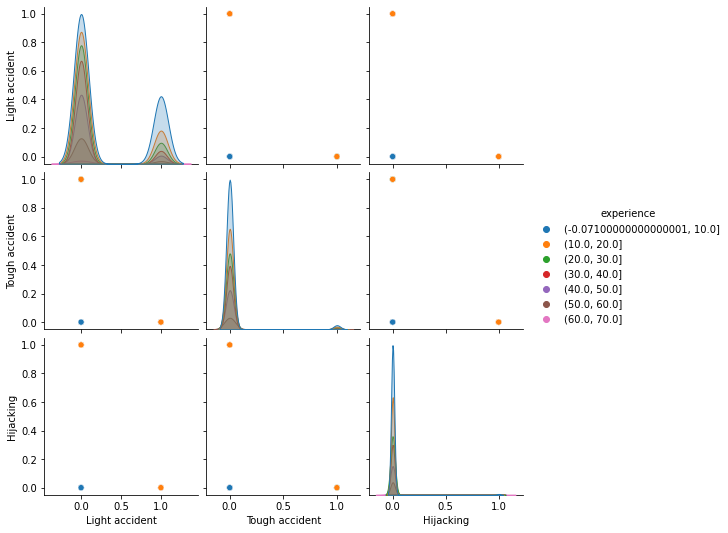

In [ ]:
sns.pairplot(dfnf, hue="experience")

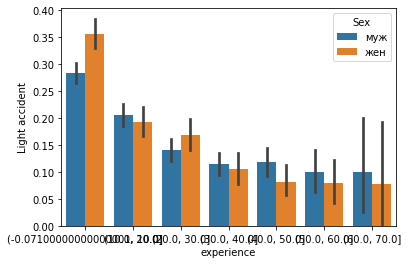

In [ ]:
sns.barplot(x="experience", y="Light accident", hue="Sex", data=dfnf)


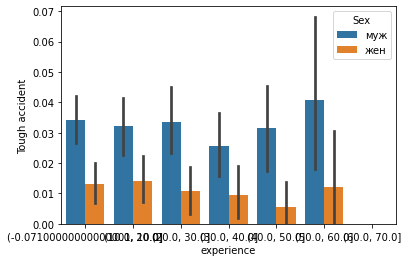

In [ ]:
sns.barplot(x="experience", y="Tough accident", hue="Sex", data=dfnf)


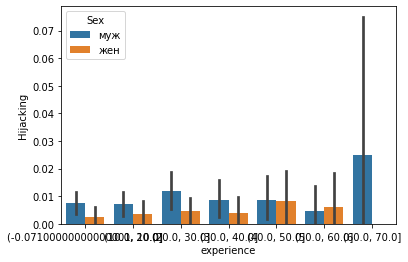

In [ ]:
sns.barplot(x="experience", y="Hijacking", hue="Sex", data=dfnf)

# Задание 2

*Изучить зависимости МАРКИ АВТО и СРЕДНЕЙ Выплаты по типам ДТП и сформулировать выводы.*

In [ ]:
df['Model'].value_counts()

Lada Granta         1043
KIA Rio              898
Hyundai Solaris      775
Lada Vesta           690
Hyundai Creta        516
VW Polo              467
Toyota RAV 4         423
Lada Largus          390
Renault Duster       365
Lada X-Ray           344
Skoda Rapid          330
Chevrolet NIVA       326
Renault Sandero      323
Renault Logan        311
KIA Sportage         310
Lada 4x4             294
VW Tiguan            266
Skoda Octavia A7     263
Toyota Camry         258
Lada Kalina          255
Renault Kaptur       228
Datsun on-DO         214
Nissan Qashqai       204
Mazda CX-5           194
Nissan X-Trail       164
Name: Model, dtype: int64

In [ ]:
df['Accident'] = df[['Light accident', 'Tough accident', 'Hijacking']].idxmax(axis=1)
sec=pd.pivot_table(df, index='Model', columns='Accident', values='Pay', fill_value=0)
sec

Accident,Hijacking,Light accident,Tough accident
Model,,,
Chevrolet NIVA,1605334.2,10498.74745,202363.4636
Datsun on-DO,0,5259.91327,72704.2
Hyundai Creta,0,23299.319,498345.0923
Hyundai Solaris,338445.2667,9642.668521,142828.7172
KIA Rio,288047.7636,9313.585862,197756.5
KIA Sportage,0,21675.408,561618.2667
Lada 4x4,0,9805.585159,101204.1364
Lada Granta,240988.775,4519.114018,102541.3091
Lada Kalina,0,6267.919028,78131




---



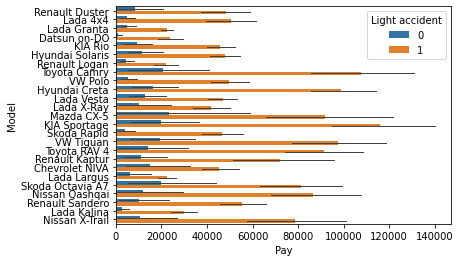

In [ ]:
sns.barplot(x='Pay', y='Model', hue='Light accident', data=df, errwidth=1)

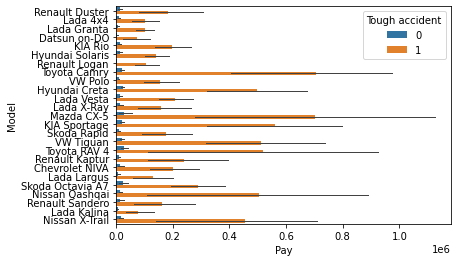

In [ ]:
sns.barplot(x='Pay', y='Model', hue='Tough accident', data=df, errwidth=1)

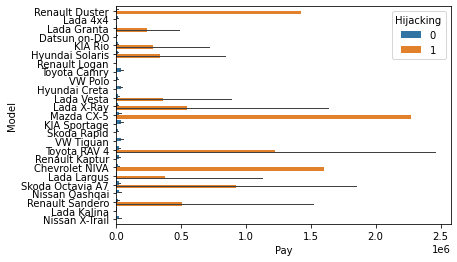

In [ ]:
sns.barplot(x='Pay', y='Model', hue='Hijacking', data=df, errwidth=1)

# Задание 3

Изучить влияет ли МАРКА АВТО на частоту попадания в ДТП и сформулировать выводы. 

In [ ]:
dfnff = df[['Model', 'Light accident', 'Tough accident', 'Hijacking']] 
third=pd.pivot_table(dfnff, index='Model', aggfunc='sum', fill_value=0)
third

,Hijacking,Light accident,Tough accident
Model,,,
Chevrolet NIVA,1,73,11
Datsun on-DO,1,47,2
Hyundai Creta,3,118,13
Hyundai Solaris,9,149,29
KIA Rio,11,177,17
KIA Sportage,1,56,9
Lada 4x4,0,55,11
Lada Granta,8,206,22
Lada Kalina,1,52,7


In [ ]:
third1=pd.pivot_table(dfnff, index='Model', aggfunc='mean', fill_value=0)
third1

,Hijacking,Light accident,Tough accident
Model,,,
Chevrolet NIVA,0.0030675,0.22393,0.033742
Datsun on-DO,0.0046729,0.21963,0.0093458
Hyundai Creta,0.005814,0.22868,0.025194
Hyundai Solaris,0.011613,0.19226,0.037419
KIA Rio,0.012249,0.1971,0.018931
KIA Sportage,0.0032258,0.18065,0.029032
Lada 4x4,0,0.18707,0.037415
Lada Granta,0.0076702,0.19751,0.021093
Lada Kalina,0.0039216,0.20392,0.027451


In [ ]:
third1.describe()

,Hijacking,Light accident,Tough accident
count,25,25,25
mean,0.0055348,0.19845,0.024131
std,0.0038043,0.019984,0.0087832
min,0,0.14912,0.0093458
25%,0.0030675,0.1863,0.018293
50%,0.005814,0.19767,0.023256
75%,0.0076923,0.21802,0.030075
max,0.012249,0.22868,0.039474


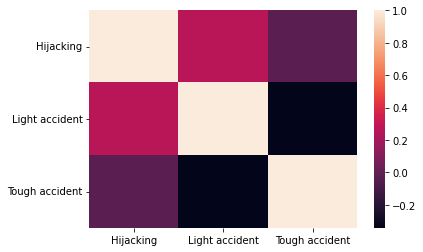

In [ ]:
sns.heatmap(third1.corr())

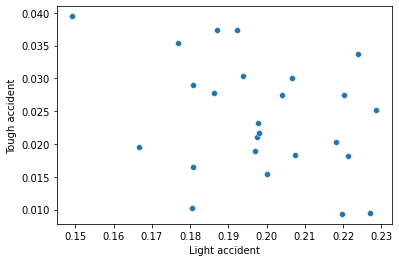

In [ ]:
sns.scatterplot(data=third1, x='Light accident', y='Tough accident')

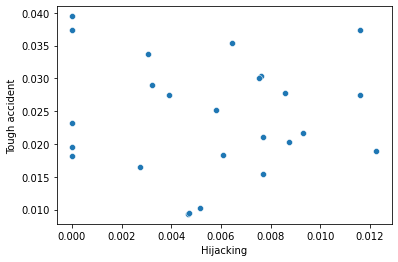

In [ ]:
sns.scatterplot(data=third1, x='Hijacking', y='Tough accident')

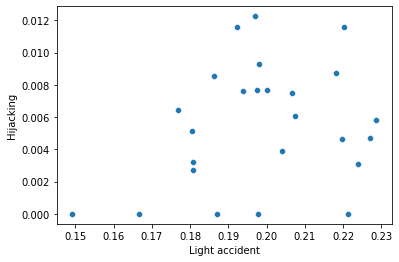

In [ ]:
sns.scatterplot(data=third1, x='Light accident', y='Hijacking')

Корреляция отсутствует 

In [ ]:
np.corrcoef(third1['Light accident'], third1['Tough accident'])[0,1]

-0.34205940089319625

In [ ]:
np.corrcoef(third1['Light accident'], third1['Hijacking'])[0,1]

0.26695069238439195

In [ ]:
np.corrcoef(third1['Hijacking'], third1['Tough accident'])[0,1]

-0.027083199610644686

# Задание 4

*Изучить как изменяется «Средняя выплата» между клиентами с ЧАСТИЧНЫМ и ПОЛНЫМ тарифом на страхование по МАРКАМ АВТО.*

In [ ]:
dfnn=df[['Model', 'Type', 'Pay']] 
fourth=pd.pivot_table(dfnn, index='Model', columns='Type', aggfunc='mean', fill_value=0)
fourth

Pay          
Type                полное частичное
Model                               
Chevrolet NIVA   42063.821 12535.271
Datsun on-DO      6752.022 5528.2632
Hyundai Creta    29206.216 37868.364
Hyundai Solaris  27298.942 14822.591
KIA Rio          24339.219 12855.255
KIA Sportage     52054.246 30246.487
Lada 4x4         12338.274 13642.141
Lada Granta       12713.69 6534.1609
Lada Kalina      7216.6442 8724.6249
Lada Largus      15182.491  7175.353
Lada Vesta       35743.057 14080.541
Lada X-Ray         27499.8 11792.947
Mazda CX-5       69881.038 18159.053
Nissan Qashqai   14901.369 28129.383
Nissan X-Trail   31468.898 21515.162
Renault Duster   28399.527 10250.512
Renault Kaptur   22311.566 19580.279
Renault Logan    8894.5793  7183.941
Renault Sandero  26479.773  15861.93
Skoda Octavia A7 31709.826 31639.985
Skoda Rapid      13667.454 13516.462
Toyota Camry     34745.262 39240.126
Toyota RAV 4     47979.752 23742.498
VW Polo          14187.041  13367.17
VW Tiguan        50251.288 27383.113

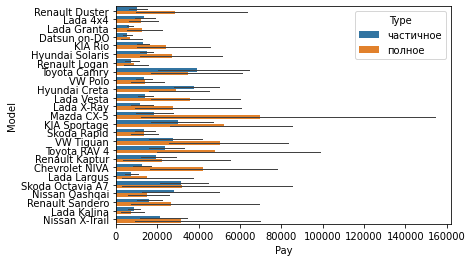

In [ ]:
sns.barplot(x='Pay', y='Model', hue='Type', data=df,  linewidth=6, errwidth=1)

In [ ]:
fourth1=pd.pivot_table(dfnn, index='Model', columns='Type', aggfunc='count', fill_value=0)
fourth1

Pay          
Type             полное частичное
Model                            
Chevrolet NIVA      103       223
Datsun on-DO         59       155
Hyundai Creta       163       353
Hyundai Solaris     225       550
KIA Rio             269       629
KIA Sportage        100       210
Lada 4x4             94       200
Lada Granta         315       728
Lada Kalina          86       169
Lada Largus         107       283
Lada Vesta          197       493
Lada X-Ray          116       228
Mazda CX-5           65       129
Nissan Qashqai       59       145
Nissan X-Trail       51       113
Renault Duster      108       257
Renault Kaptur       59       169
Renault Logan        82       229
Renault Sandero     101       222
Skoda Octavia A7     70       193
Skoda Rapid          98       232
Toyota Camry         87       171
Toyota RAV 4        134       289
VW Polo             130       337
VW Tiguan            95       171

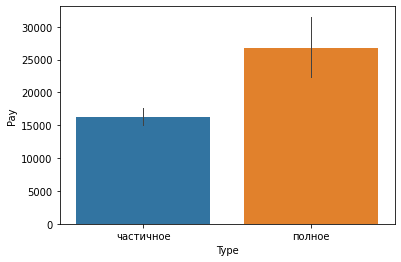

In [ ]:
sns.barplot(x='Type', y='Pay', data=df,  linewidth=6, errwidth=1)

In [ ]:
df['Type'].value_counts()

частичное    6878
полное       2973
Name: Type, dtype: int64

# Модель

In [ ]:
dfnf.pivot_table(index='Sex', columns='experience', aggfunc='mean', fill_value=0)

Hijacking               ... Tough accident             
experience (-0.07100000000000001, 10.0] (10.0, 20.0]  ...   (50.0, 60.0] (60.0, 70.0]
Sex                                                   ...                            
жен                        0.0026086957 0.0035419126  ...    0.012195122            0
муж                         0.007518797  0.007293946  ...    0.040909091            0

[2 rows x 21 columns]

In [ ]:
from google.colab import files
modelsavg = files.upload()

Saving средние по марка.xlsx to средние по марка.xlsx


In [ ]:
mavg = pd.read_excel(io.BytesIO(modelsavg['средние по марка.xlsx']))
mavg.head(4)

,Car model,Full,Partial
0,Econom,17660.026,10223.142
1,Medium,27911.795,19519.8
2,Premium,41537.935,26361.556


Это средние выплаты для машин категорий "Эконом" (стоимость <1 млн. рублей), "Медиум" (стоимость >=1 и <1,5 млн. рублей) и "Премиум" (стоимость >=1,5 млн. рублей).
Данные в базе данных марки авто были поделены так: 
* **Эконом:** Lada Kalina, Chevrolet Niva, Lada Granta, 
Datsun on-DO, Lada 4x4, Renault Logan, Renault Sandero, Lada Largus, Hyundai Solaris.
* **Медиум:** Lada Vesta, Lada X-Ray, KIA Rio, Skida Rapid, VW Polo. REnailt Duster, Hyundai Creta, Renault Kapture, Skoda Octavia A7.
* **Премиум:** Nissan Qashqai, KIA Sportage, Mazda CX-5, Nissan X-Trail, Toyota Camry, Toyota RAV 4.

In [ ]:
from google.colab import files
dtppr = files.upload()

Saving верятность попадания в дтп.xlsx to верятность попадания в дтп.xlsx


In [ ]:
dtpp = pd.read_excel(io.BytesIO(dtppr['верятность попадания в дтп.xlsx']))
dtpp.head(4)

,Unnamed: 0,0-9,10-19,20-29,30-39,40-49,50-59,60-69
0,жен,0.38095238,0.21820303,0.17525773,0.11089494,0.094240838,0.081521739,0.060606061
1,муж,0.32674853,0.23799127,0.17631345,0.1480611,0.14634146,0.1300813,0.081632653


В таблице выше представлена вероятность попасть в дтп, как в легкое, так и в тяжелое

In [ ]:
from google.colab import files
insacc = files.upload()

Saving верятность угона.xlsx to верятность угона.xlsx


In [ ]:
inac = pd.read_excel(io.BytesIO(insacc['верятность угона.xlsx']))
inac.head(4)

,Unnamed: 0,0-9,10-19,20-29,30-39,40-49,50-59,60-69
0,жен,0.3837535,0.22170362,0.17967599,0.11478599,0.10209424,0.086956522,0.060606061
1,муж,0.33368927,0.24526929,0.18878005,0.15628672,0.15609756,0.13414634,0.10204082


В таблице выше представлена вероятность настпления страхового случая, то есть легкого ДТП, тяжелого, а также угона

In [ ]:
dtp = 0,225 #вероятность попасть в дтп, вне зависимости от стажа и пола



---



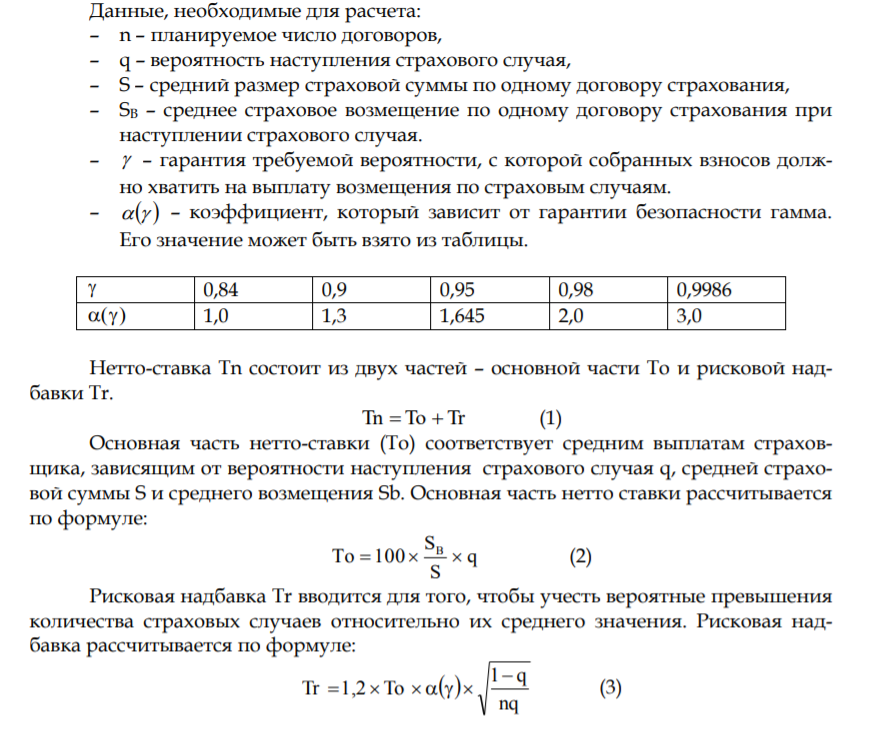

Для всех расчетов будет взята гарантия требуемой вероятности равная 0,84

**Описание модели**

На вход получаем марку автомобиля, пол и стаж вождения клиента, желаемый тип тарифа, франшизу, а также попадал ли клиент в ДТП в этом году.

**РАСЧЕТЫ**

* За основу берутся средние выплаты по категории, к которой относится данная марка автомобиля, и выбранному тарифу. 
* Ввиду недостатка данных, То будет подсчитываться иным способом: полученная на предыдущем шаге выплата будет умножена на (1+p), где p - вероятность наступления страхового случая, с учетом указанного пола и стажа вождения. Соответственно, для частичного тарифа будет учитываться только вероятность попадания в ДТП, а для полного вероятность попадания в ДТП или угона.
* Если клиент попадаал в ДТП в течение года, то значение умножается на (1 + вероятность попасть в дтп, вне зависимости от пола и стажа). Таким образом осуществляется скидка для тех, кто не попадал в ДТП.
* По указанной выше формуле рассчитываем рисковую надбавку Tr. За n принимается число договоров (9852), существующее в базе данных, так как в ней даны данные за год.
* Умножаем сумму То и Тr на 1,15, чтобы обеспечить прибыль не менее 15%.
* Вычитаем франшизу.


In [ ]:
#ввод стоимости авто
while True:
        try:
            category = float(input("Какова стоимость вашего автомобиля (млн рублей)? "))
        except ValueError:
            print("Error! Это не число, попробуйте снова.")
        else:
            break
if category<1:
    category = 1
elif 1<=category<1.5:
    category=2
else:
    category = 3;

#ввод пола
a=True
while a==True:
        sex = str(input("Назовите ваш пол: "))
        if sex != "жен" and sex != "муж":
            print("Используйте формат 'жен', 'муж'")
        else:
          a=False

#ввод стажа вождения
while True:
        try:
            exp = int(input("Каков стаж вашего вождения (в годах)? "))
        except ValueError:
            print("Error! Это не число, попробуйте снова.")
        else:
            break
for i in range(7): #группировка стажей
    if i*10<exp<=(i+1)*10:
      exp=i+1
if exp>7:
   exp=7

#выбор тарифа
b=True
while b==True:
        tarif = input("Выберите тариф. Введите 'Полный' или 'Частичный'): ")
        if tarif != "Полный" and tarif != "Частичный":
            print("Используйте формат 'Полный', 'Частичный'")
        else:
          b=False

#ввод франшизы
while True:
        try:
            fran = float(input("Введите сумму, которую готовы покрыть самостоятельно (франшизу): "))
        except ValueError:
            print("Error! Это не число, попробуйте снова.")
        else:
            break  

#ввод числа дтп за год
while True:
        try:
            dtpyear = int(input("Сколько ДТП у вас было в этом году? "))
        except ValueError:
            print("Error! Это не число, попробуйте снова.")
        else:
            break            


Какова стоимость вашего автомобиля (млн рублей)? 2
Назовите ваш пол: муж
Каков стаж вашего вождения (в годах)? 6
Выберите тариф. Введите 'Полный' или 'Частичный'): Полный
Введите сумму, которую готовы покрыть самостоятельно (франшизу): 0
Сколько ДТП у вас было в этом году? 0


In [ ]:
#выбор выплаты на основе марке авто и тарифа
pay=0
if category==1 and tarif=="Полный":
   pay = mavg.at[0,'Full'] 
elif category==2 and tarif=="Полный":
   pay = mavg.at[1,'Full']
elif category==3 and tarif=="Полный":
   pay = mavg.at[2,'Full']
elif category==1 and tarif=="Частичный":
   pay = mavg.at[0,'Partial']
elif category==2 and tarif=="Частичный":
   pay = mavg.at[1,'Partial']
elif category==3 and tarif=="Частичный":
   pay = mavg.at[2,'Partial']

#выбор вероятности страхового случая и выплаты, с ее учетом
if tarif=="Полный":
    if sex=='жен':
      for i in range(7):
          if exp==i+1:
             To=pay*(1+inac.at[0,"{}-{}".format(i*10, (i+1)*10-1)])
             p=inac.at[0,"{}-{}".format(i*10, (i+1)*10-1)]
    elif sex=='муж':
      for i in range(7):
          if exp==i+1:
            To=pay*(1+inac.at[1,"{}-{}".format(i*10, (i+1)*10-1)])
            p=inac.at[1,"{}-{}".format(i*10, (i+1)*10-1)] 
elif tarif=='Частичный':
     if sex=='жен':
      for i in range(7):
          if exp==i+1:
           To=pay*(1+dtpp.at[0,"{}-{}".format(i*10, (i+1)*10-1)])
           p=dtpp.at[0,"{}-{}".format(i*10, (i+1)*10-1)]
     elif sex=='муж':
         for i in range(7):
           if exp==i+1:
             To=pay*(1+dtpp.at[1,"{}-{}".format(i*10, (i+1)*10-1)])
             p=dtpp.at[1,"{}-{}".format(i*10, (i+1)*10-1)]
#подсчет формулы страхового взноса
if dtpyear>0: #формирование скидки в 10%
  To=To*1.1

Tr=1.2*To*((1-p)/(9852*p))**0.5 #расчет рисковой надбавки
T=(To+Tr)*1.15 #подсчет взноса вместо с прибылью 15%
T=T-fran #вычет франшизы
print('Сумма вашего страхового взноса - {:4g}'.format(T))

Сумма вашего страхового взноса - 64796.9


In [ ]:
!pip install -q streamlit

     |████████████████████████████████| 8.3 MB 14.7 MB/s 
     |████████████████████████████████| 4.3 MB 57.7 MB/s 
     |████████████████████████████████| 76 kB 4.3 MB/s 
     |████████████████████████████████| 180 kB 65.6 MB/s 
     |████████████████████████████████| 111 kB 88.0 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 124 kB 93.3 MB/s 
     |████████████████████████████████| 788 kB 72.7 MB/s 
     |████████████████████████████████| 370 kB 87.1 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.20 which is incompatible.
google-colab 1.0.0 requires ipykernel~=4.10, but you have ipykernel 6.4.2 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.28.0 which is incompatib